In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('candy_production.csv', index_col='date', parse_dates=True)

In [4]:
df

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842
...,...
2018-08-01,112.279777
2018-09-01,123.126335
2018-10-01,123.634268


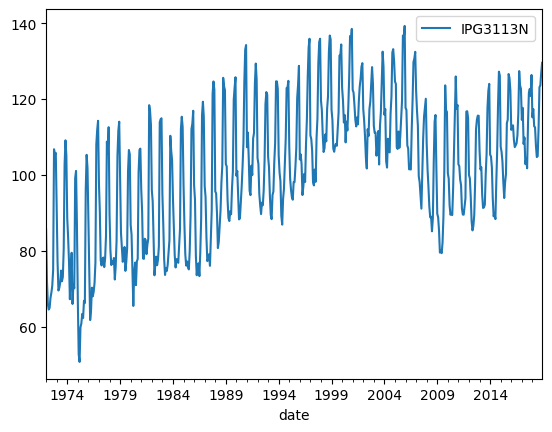

In [12]:
fig, ax = plt.subplots()
df.plot(ax=ax)
plt.show()

In [13]:
df_train=df.loc[:'2009']
df_test=df.loc['2010':]

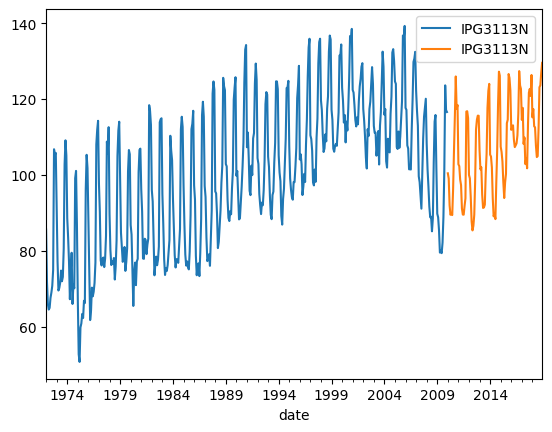

In [14]:
fig, ax = plt.subplots()
df_train.plot(ax=ax)
df_test.plot(ax=ax)
plt.show()

In [16]:
# dicky fuller test
# 추세 정상성에 대해서만 테스
# 귀무가설 - 시계열이 비정상적
from statsmodels.tsa.stattools import adfuller
results=adfuller(df['IPG3113N'])

In [17]:
results
# 첫번째 숫자가 음수일수록 데이터가 정상적일 가능성 높음
# 두 번째 : p값 / p값이 작으면 귀무가설 기각 - 정상적

(-1.7760153075016134,
 0.3924327500713988,
 14,
 549,
 {'1%': -3.4423174665535385,
  '5%': -2.866818952732754,
  '10%': -2.569581505602171},
 3094.828881317046)

In [22]:
# 차분
df_stationary=df.diff()
df_statinary=df_stationary.dropna()

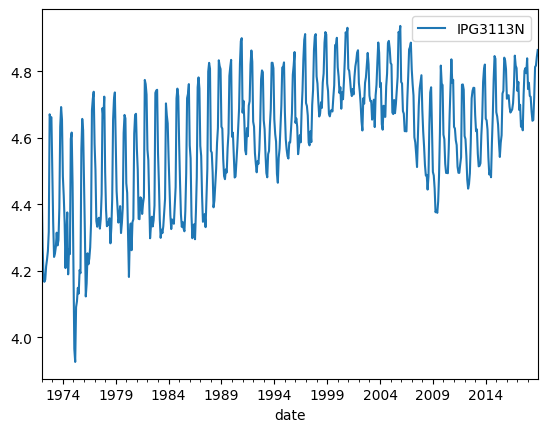

In [24]:
import numpy as np
df_log=np.log(df)
fig, ax = plt.subplots()
df_log.plot(ax=ax)
plt.show()

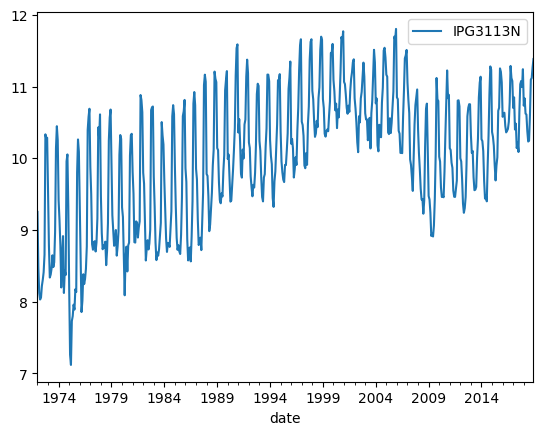

In [25]:
df_sqrt=np.sqrt(df)
fig, ax = plt.subplots()
df_sqrt.plot(ax=ax)
plt.show()

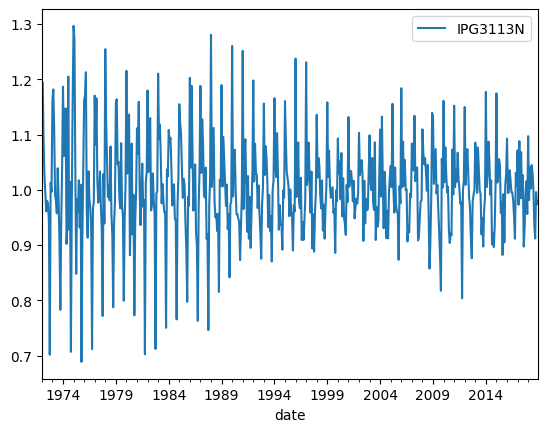

In [28]:
df_shift=df.shift(1)/df
fig, ax = plt.subplots()
df_shift.plot(ax=ax)
plt.show()

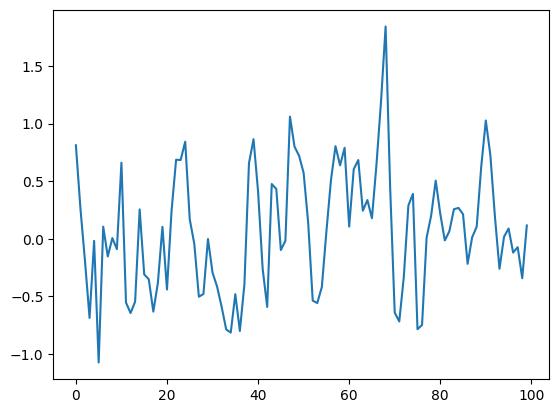

In [36]:
# arma data 형성
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)
ar_coefs=[1,-0.5] # 실제로 원하는 계수의 음수
ma_coefs=[1,0.2]
# 첫 번째 1 - 제로 지연 기간, 항상 1로 설정
y=arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)
plt.plot(y)
plt.show()

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(y,order=(1,0,1))
results=model.fit()

In [38]:
amazon=pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)

In [40]:
amazon=amazon.sort_index()

In [41]:
amazon

,close
date,
2014-02-10,360.87
2014-02-11,361.79
2014-02-12,349.25
2014-02-13,357.20
2014-02-14,357.35
...,...
2019-02-04,1633.31
2019-02-05,1658.81
2019-02-06,1640.26


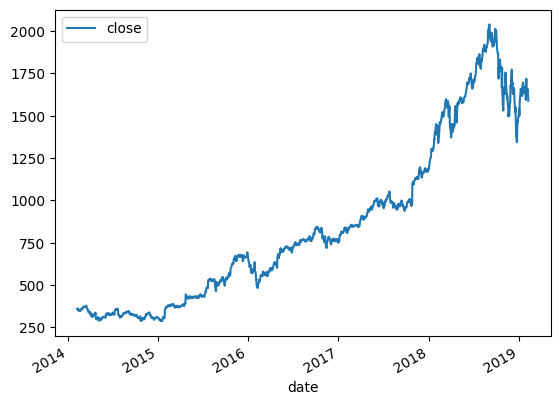

In [42]:
fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

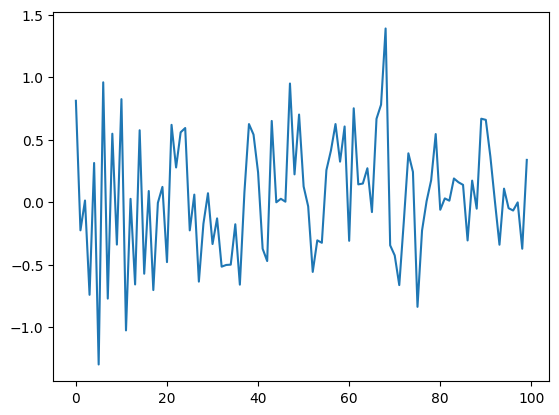

In [43]:
np.random.seed(1)
ar_coefs=[1,0.2] # 실제로 원하는 계수의 음수
ma_coefs=[1,0.3,0.4]
# 첫 번째 1 - 제로 지연 기간, 항상 1로 설정
y=arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)
plt.plot(y)
plt.show()